![logo](banner.jpg)

<h1><center><span style="color:blue">TASCA 16 - IT Academy</span></center></h1>
<h2><center><span style="color:blue">Curs Data Science</span></center></h2>

In [161]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import category_encoders as ce
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from 

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import time
import calendar
import warnings
warnings.filterwarnings('ignore')

In [162]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download("vader_lexicon")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Marta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Marta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Marta\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Como de formación y profesión me he dedicado siempre al marketing y a las ventas, me ha parecido interesante realizar esta tarea
sobre la previsión de ventas de una cadena de farmacias europea. Para ello partimos de la base de 2 datasets: un dataset con información de las tiendas y otro con información de las ventas. 

__INFORMACIÓN DE LOS ATRIBUTOS:__

-__Store__ - Una identificación única para cada tienda.

-__Sales__ - el volumen de negocios de un día determinado (esto es lo que está prediciendo).

-__Customers__ - el número de clientes en un día determinado.

-__Open__ - un indicador de si la tienda estaba abierta: 0 = cerrada, 1 = abierta.

-__StateHoliday__ - indica un festivo estatal. Normalmente todas las tiendas están cerradas: a = festivo, b = festivo de Pascua,
                    c = Navidad, 0 = Ninguno.

-__SchoolHoliday__ - indica si la tienda se vio afectada por el cierre de las escuelas públicas.

-__StoreType__ -diferencia entre 4 modelos de tienda diferentes: a, b, c, d.

-__Assortment__ - describe un nivel de surtido: a = básico, b = extra, c = extendido.

-__CompetitionDistance__ - distancia en metros hasta la tienda competidora más cercana.

-__CompetitionOpenSince [Month / Year]__ - proporciona el año/mes aprox. del momento en que se abrió el competidor más cercano.

-__Promo__ - indica si una tienda está ejecutando una promoción ese día.

-__Promo2__ - Promoción continua y consecutiva para algunas tiendas: 0 = la tienda no participa, 1 = la tienda participa.

-__Promo2Since [Year / Week]__ - describe el año y la semana calendario en que la tienda comenzó a participar en Promo2.

-__PromoInterval__ - describe los intervalos consecutivos en que se inicia Promo2, nombrando los meses en que la promo se inicia
                     de nuevo. 

In [163]:
# cargamos el dataset correspondiente a las Ventas

venta=pd.read_csv("Ventas.csv", sep=",", encoding='utf8') 

In [164]:
venta.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [165]:
# cargamos el dataset correspondiente a la información de las tiendas

tienda=pd.read_csv("Tiendas.csv", sep=",", encoding='utf8') 

In [166]:
tienda.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [167]:
tienda.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [168]:
venta.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [169]:
# A continuación comprobamos si los datasets tienen valores nulos. 

In [170]:
venta.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [171]:
tienda.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [172]:
# Como me interesa aligerar el dataset pq el PC no me da mucho de sí, decido eliminar los valores NaN en lugar de sustituirlos
# por su media.

tienda.dropna(inplace=True) 

In [173]:
# Reemplazamos por valores numéricos las columnas que tienen etiquetas (ver Atributos más arriba)

tienda['StoreType'].value_counts()

a    200
d    118
c     47
Name: StoreType, dtype: int64

In [174]:
tienda['Assortment'].value_counts()

a    216
c    149
Name: Assortment, dtype: int64

In [175]:
tienda['StoreType']= tienda['StoreType'].map({'a':1, 'b' : 2, 'c': 3, 'd' : 4})
tienda['Assortment'] = tienda['Assortment'].map({'a':1, 'b' : 2, 'c': 3})

In [176]:
tienda.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1,2,1,1,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
10,11,1,3,960.0,11.0,2011.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct"
13,14,1,1,1300.0,3.0,2014.0,1,40.0,2011.0,"Jan,Apr,Jul,Oct"
14,15,4,3,4110.0,3.0,2010.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [177]:
#A continuación hacemos un merge con los datasets tienda y venta.

data = pd.merge(venta, tienda, on='Store', how='left')
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,1.0,1.0,570.0,11.0,2007.0,1.0,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,1.0,1.0,14130.0,12.0,2006.0,1.0,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
data.shape

(1017209, 18)

In [179]:
data.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                    692883
Assortment                   692883
CompetitionDistance          692883
CompetitionOpenSinceMonth    692883
CompetitionOpenSinceYear     692883
Promo2                       692883
Promo2SinceWeek              692883
Promo2SinceYear              692883
PromoInterval                692883
dtype: int64

In [180]:
# Al hacer el merge se han generado muchos valores NaN. Dado que lo que me interesa es "aligerar" el dataset por problemas de
# memoria, elimino elimino dichos valores. 

data.dropna(inplace = True)

In [181]:
data.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [182]:
def checkpromomonth(row):
 if (row['MonthName'] in row['PromoInterval']):
    return 1
 else:
    return 0

In [183]:
def ProcessData(data):
    data["CompetitionDistance"].fillna(data["CompetitionDistance"].mean(), inplace = True)
    
    data['StateHoliday']= data['StateHoliday'].map({'0':0, 0: 0,'a':1, 'b' : 2, 'c': 3})
    
    data['Date']=pd.to_datetime(data['Date'])
    data['Year']=data['Date'].dt.year
    data['MonthNumber']=data['Date'].dt.month
    data['MonthName']=data['MonthNumber'].apply(lambda x: calendar.month_abbr[x])
    data['Day']=data['Date'].dt.day
    data['WeekNumber']=data['Date'].dt.weekofyear

    data['CompetitionOpen'] = 12 * (data['Year'] - data['CompetitionOpenSinceYear']) + (data['MonthNumber'] - data['CompetitionOpenSinceMonth'])
    data['CompetitionOpen'] = data['CompetitionOpen'].apply(lambda x: x if x > 0 else 0)

    data['Promo2Open'] = 12 * (data['Year'] - data['Promo2SinceYear']) + (data['WeekNumber'] - data['Promo2SinceWeek']) / float(4)
    data['Promo2Open'] = data['Promo2Open'].apply(lambda x: x if x > 0 else 0)

    data['PromoInterval']=data['PromoInterval'].astype(str)
    
    data['IsPromoMonth'] =  data.apply(lambda row: checkpromomonth(row),axis=1)

    data.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear'], axis = 1,  inplace = True)
    data.drop(['Promo2SinceYear', 'Promo2SinceWeek'], axis = 1,  inplace = True)
    data.drop(['Date', 'MonthName','PromoInterval'], axis = 1,  inplace = True)

In [184]:
ProcessData(data)

In [185]:
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,MonthNumber,Day,WeekNumber,CompetitionOpen,Promo2Open,IsPromoMonth
1,2,5,6064,625,1,1,0,1,1.0,1.0,570.0,1.0,2015,7,31,31,92.0,64.50,1
2,3,5,8314,821,1,1,0,1,1.0,1.0,14130.0,1.0,2015,7,31,31,103.0,52.25,1
10,11,5,10457,1236,1,1,0,1,1.0,3.0,960.0,1.0,2015,7,31,31,44.0,43.50,1
13,14,5,6544,710,1,1,0,1,1.0,1.0,1300.0,1.0,2015,7,31,31,16.0,45.75,1
14,15,5,9191,766,1,1,0,1,4.0,3.0,4110.0,1.0,2015,7,31,31,64.0,52.25,1


In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324326 entries, 1 to 1017204
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Store                324326 non-null  int64  
 1   DayOfWeek            324326 non-null  int64  
 2   Sales                324326 non-null  int64  
 3   Customers            324326 non-null  int64  
 4   Open                 324326 non-null  int64  
 5   Promo                324326 non-null  int64  
 6   StateHoliday         324326 non-null  int64  
 7   SchoolHoliday        324326 non-null  int64  
 8   StoreType            324326 non-null  float64
 9   Assortment           324326 non-null  float64
 10  CompetitionDistance  324326 non-null  float64
 11  Promo2               324326 non-null  float64
 12  Year                 324326 non-null  int64  
 13  MonthNumber          324326 non-null  int64  
 14  Day                  324326 non-null  int64  
 15  WeekNumber      

In [187]:
data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Store,324326.0,558.92,327.25,2.0,276.00,563.0,848.0,1111.0
DayOfWeek,324326.0,4.00,2.00,1.0,2.00,4.0,6.0,7.0
Sales,324326.0,5398.98,3496.79,0.0,3527.00,5467.0,7453.0,37646.0
Customers,324326.0,553.96,361.78,0.0,369.00,557.0,748.0,3200.0
Open,324326.0,0.83,0.38,0.0,1.00,1.0,1.0,1.0
Promo,324326.0,0.38,0.49,0.0,0.00,0.0,1.0,1.0
StateHoliday,324326.0,0.05,0.28,0.0,0.00,0.0,0.0,3.0
SchoolHoliday,324326.0,0.18,0.38,0.0,0.00,0.0,0.0,1.0
StoreType,324326.0,2.22,1.38,1.0,1.00,1.0,4.0,4.0
Assortment,324326.0,1.83,0.99,1.0,1.00,1.0,3.0,3.0


In [88]:
# Ya tenemos nuestro dataset limpio y listo para trabajar con él. 

<AxesSubplot:>

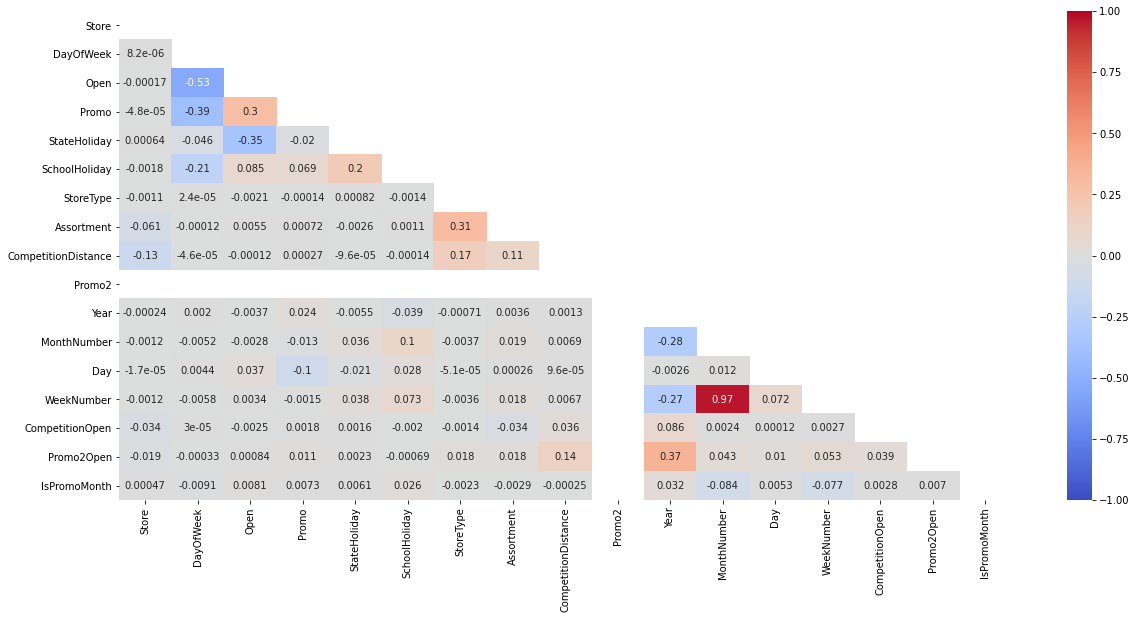

In [67]:
# Observamos que existe muy poca correlación entre los atributos del dataset. Siguiendo la sugerencia de mejora recibidos en la
# tasca anterior, he dibujado sólo el 'lower triangle' para evitar la repetición ;)

corr = data.drop(['Customers', 'Sales'], axis = 1).corr()
matrix = np.triu(corr)
fig, ax = plt.subplots(figsize = [20, 9])

sns.heatmap(corr, annot = True, vmin = -1, vmax = 1, center = 0, cmap="coolwarm", mask= matrix)

In [188]:
#Definimos a continuación nuestros valores X e y(target)

y = data['Sales']
data.drop(['Sales','Customers'], axis = 1,  inplace = True)

In [189]:
data.nunique()

Store                  365
DayOfWeek                7
Open                     2
Promo                    2
StateHoliday             4
SchoolHoliday            2
StoreType                3
Assortment               2
CompetitionDistance    279
Promo2                   1
Year                     3
MonthNumber             12
Day                     31
WeekNumber              52
CompetitionOpen        335
Promo2Open             289
IsPromoMonth             2
dtype: int64

In [190]:
num_columns = data.columns[data.nunique() > 12]
cat_columns = data.columns[data.nunique() <= 12]
num_columns, cat_columns

(Index(['Store', 'CompetitionDistance', 'Day', 'WeekNumber', 'CompetitionOpen',
        'Promo2Open'],
       dtype='object'),
 Index(['DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
        'StoreType', 'Assortment', 'Promo2', 'Year', 'MonthNumber',
        'IsPromoMonth'],
       dtype='object'))

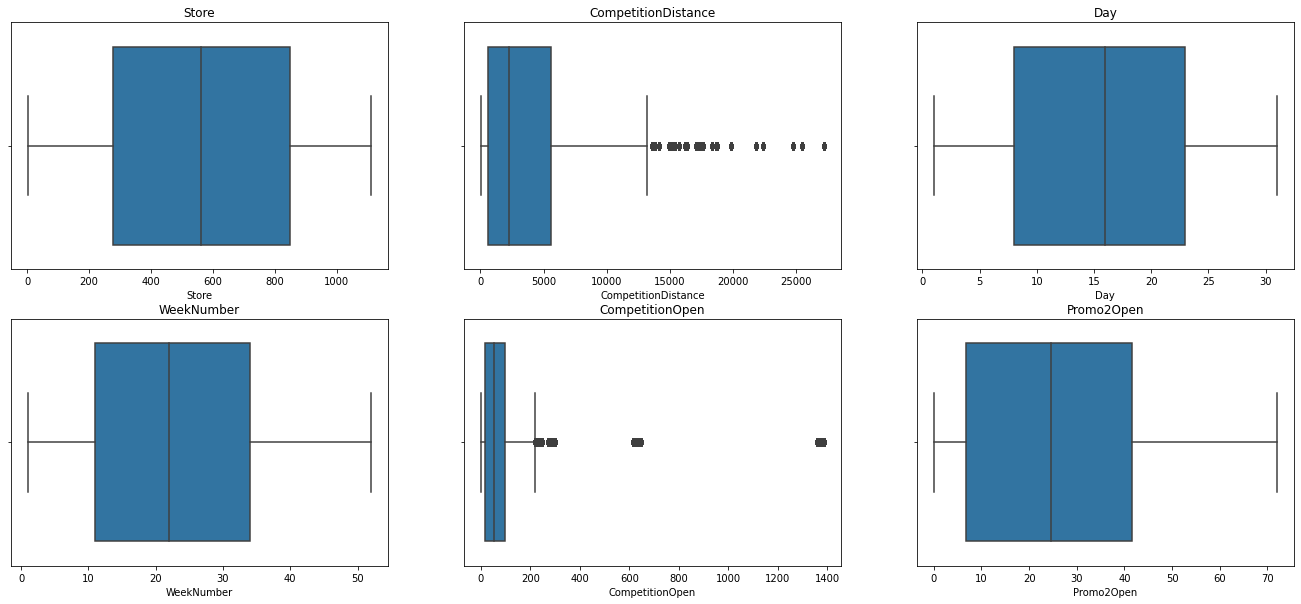

In [71]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = [23, 10])
for feature, ax in zip(num_columns, ax.flatten()):
  sns.boxplot(data[feature], ax =ax, orient = 'v')
  ax.set_title(feature)

In [191]:
ct=ColumnTransformer([
    ('rs',RobustScaler(),num_columns), # utilizamos RobustScaler para reducir la influencia de los outliers
    ('ohe',OneHotEncoder(),cat_columns),
    ],remainder="passthrough")

ct.fit_transform(data)

array([[-0.98076923, -0.33001988,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.97902098,  2.36580517,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.96503497, -0.25248509,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.95104895, -0.16500994, -1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.95454545,  0.25049702, -1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.95804196, -0.06560636, -1.        , ...,  0.        ,
         0.        ,  1.        ]])

In [192]:
X=data

In [193]:
#Usaremos los datos escalados divididos internamente en train/test, crearemos nuestro modelo y haremos la predicción test data. 

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30)

In [194]:
# Creamos nuestro Pipeline para RandomForestRegressor

steps_rf = [('sts', StandardScaler() ),
            ('pca', PCA() ),
            ('rf',  RandomForestRegressor(random_state = 42) )]

pipe_rf = Pipeline(steps_rf)

pipe_rf.get_params()

{'memory': None,
 'steps': [('sts', StandardScaler()),
  ('pca', PCA()),
  ('rf', RandomForestRegressor(random_state=42))],
 'verbose': False,
 'sts': StandardScaler(),
 'pca': PCA(),
 'rf': RandomForestRegressor(random_state=42),
 'sts__copy': True,
 'sts__with_mean': True,
 'sts__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': None,
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'rf__bootstrap': True,
 'rf__ccp_alpha': 0.0,
 'rf__criterion': 'mse',
 'rf__max_depth': None,
 'rf__max_features': 'auto',
 'rf__max_leaf_nodes': None,
 'rf__max_samples': None,
 'rf__min_impurity_decrease': 0.0,
 'rf__min_impurity_split': None,
 'rf__min_samples_leaf': 1,
 'rf__min_samples_split': 2,
 'rf__min_weight_fraction_leaf': 0.0,
 'rf__n_estimators': 100,
 'rf__n_jobs': None,
 'rf__oob_score': False,
 'rf__random_state': 42,
 'rf__verbose': 0,
 'rf__warm_start': False}

In [195]:
# A continuación vamos a utilizar Grid Search para definir los parámetros de nuestro Pipeline.

In [196]:
X_train.head()

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,MonthNumber,Day,WeekNumber,CompetitionOpen,Promo2Open,IsPromoMonth
201189,490,7,0,0,0,0,1.0,1.0,660.0,1.0,2015,2,1,5,22.0,3.25,0
881341,162,4,1,1,0,0,4.0,3.0,5340.0,1.0,2013,5,2,18,14.0,37.25,0
923177,743,2,1,1,0,0,1.0,1.0,6710.0,1.0,2013,3,26,13,112.0,11.75,0
559486,542,6,1,0,0,0,1.0,1.0,7280.0,1.0,2014,2,15,7,17.0,13.50,0
665488,619,2,1,0,0,0,1.0,1.0,1600.0,1.0,2013,11,12,46,89.0,48.25,1


In [221]:
param_grid = {'rf__n_estimators': [500, 100],
              'rf__max_features': ['auto', 'sqrt'],
              'rf__max_depth' : [8, 12, 16],
              'rf__criterion' :['entropy','mse'],
              'rf__min_samples_leaf': [1, 2, 4],
              'rf__min_samples_split': [2, 5, 10]}

# Instanciamos RandomizedSearch con nuestro pipe_rf. Intenté ejecutar GridSearch pero, tras más de 24h ejecutando sin resultado,
# lo cambié por RandomizedSearch, que permite seleccionar el número de iteraciones (y por tanto, reducir el tiempo de ejecución).
# Grid_search = GridSearchCV(estimator = pipe_rf, param_grid = param_grid, cv=2)

rf_random = RandomizedSearchCV(estimator = pipe_rf, param_distributions = param_grid, n_iter = 20, cv = 2, random_state=42)

In [222]:
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('sts', StandardScaler()),
                                             ('pca', PCA()),
                                             ('rf',
                                              RandomForestRegressor(random_state=42))]),
                   n_iter=20,
                   param_distributions={'rf__criterion': ['entropy', 'mse'],
                                        'rf__max_depth': [8, 12, 16],
                                        'rf__max_features': ['auto', 'sqrt'],
                                        'rf__min_samples_leaf': [1, 2, 4],
                                        'rf__min_samples_split': [2, 5, 10],
                                        'rf__n_estimators': [500, 100]},
                   random_state=42)

In [223]:
print(rf_random.best_params_)
print(rf_random.best_score_)

{'rf__n_estimators': 500, 'rf__min_samples_split': 5, 'rf__min_samples_leaf': 1, 'rf__max_features': 'auto', 'rf__max_depth': 16, 'rf__criterion': 'mse'}
0.782542745199752


In [227]:
# Modelo con los parámetros obtenidos del Random Search.

model_rf = RandomForestRegressor(random_state = 42, n_estimators=500, max_features= 'auto', max_depth= 16, criterion= 'mse',
                                min_samples_split= 5, min_samples_leaf= 1)

model_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=16, min_samples_split=5, n_estimators=500,
                      random_state=42)

In [228]:
# Modelo con los parámetros iniciales antes del Random Search.

model = pipe_rf.fit(X_train, y_train)

In [229]:
y_pred = model.predict(X_test) #Predecimos con nuestro test data utilizando el modelo inicial.
y_pred_rf = model_rf.predict(X_test) # Predecimos con nuestro test data utilizando el modelo final. 

In [232]:
# Gracias al tuning de parámetros con RandomSearch hemos mejorado nuestro accuracy en un 4%!

print('Accuracy score before Random Search:', r2_score(y_test, y_pred).round(2))
print('Accuracy score after Random Search:', r2_score(y_test, y_pred_rf).round(2))

Accuracy score before Random Search: 0.87
Accuracy score after Random Search: 0.91


### <span style="color:black">Exercici 2.</span>

__Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules:__ <span style="color:blue">__[X] Fet__</span>

In [4]:
# Como gran cinéfila, he seleccionado reviews de usuarios (de diversas puntuaciones, aunque la mayoría positivas) del film 
# 'Goodfather: part II' de IMDb para la realización de este ejercicio :) 

text="""One of the all time greats. Or probably the alone greatest thing ever made in the history of cinematography. This movie 
is both prequel and sequel of the first godfather movie. I have never watched anything like this in my entire life. This 
movie has explained the life of underworld people in a great way. It also shows how vengeance eradicates happiness from your 
life. People don't even care about their family in greed of power. It is a masterpiece that can never be written off even after 
centuries. Even if you are not into these kind of movies, I will suggest to watch it for at least once in your life or you will 
be deprived of one of the greatest things to watch that have been ever made. 
While the first movie had a lot of freshness and intensity, this movie is explaining the rise of Vito and Michael with more 
detail and explanation, so that it is taking a much longer breathing to say it. The mixture of past and present may work for 
some, but it didn't work for me. I had the feeling the film was repeating itself constantly with past and present, even when 
the scenes with Vito Corleone weren't that good and a bit too cliché and strangely comical. I don't understand why this film is 
rated to high.
I had avoided watching this sequel for twenty years,fearful I would prefer it over the original. How wrong I was! Unlike most of
the reviewers here who can't seem to gush effusively enough over this film, I feel it is a good distance behind the original. 
Here we have the overrated Al Pacino acting as if in a trance, stone-faced,humorless and cold-blooded, the epitome of egomania 
Nothing matters to him except crooked power and greed. A truly unsavory person.a rotten husband and father,he leaves little to 
admire,unlike his predecessor. Robert DeNiro gives another one of his elliptical performances. John Cazale as Fredo and Michael 
Gazzo as Freddie save the movie from being downright boring. What was the plot? Who cares?
This movie could be made a lot better if it was shorter. It drags too much on useless scenes, displaying scenarios and 
expressions in the faces of characters. Which leads to the third point.
This movie, coming after the first, is a change of pace. The micheal segments of the film are more politcal, strategic, and 
focused on the sematics of the mafia than the previous film, and because of this it loses its charm from the last film. Aswell 
as this, because of how uncaring and heartless micheal is, its hard to attach to him as a character, the character isnt 
interesting enough in other ways to be likeable to me. the main aspect which saves the film is the vito corleone flashbacks, 
these segments are great insight into vitos past, with great acting from robert de niro, honestly if this was the main part of 
the film, this would easily be better than pt 1. The ending atleast is nicely thought provoking, and makes you wonder what 
happened to micheal, but the rest of the micheal segments arent amazing."""

In [5]:
# Segmentamos el texto en palabras y posteriormente calculamos su frecuencia.

tokenized_word=word_tokenize(text)
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 292 samples and 593 outcomes>


In [6]:
# A continuación vemos las 5 palabras más repetidas. 

fdist.most_common(5)

[('the', 34), ('.', 27), (',', 27), ('of', 22), ('and', 17)]

### <span style="color:black">Exercici 3.</span>

__Treu les stopwords i realitza stemming al teu conjunt de dades:__ <span style="color:blue">__[X] Fet__</span>

__- Primero vamos a eliminar los stopwords de nuestro texto.__ 

In [7]:
# Cargamos la lista de stopwords (consideradas como ruido en el texto) de la lengua inglesa.

stop_words=set(stopwords.words("english"))
print(stop_words)     

{"won't", 'whom', 'himself', 'themselves', 'me', 'if', 'of', 'about', "it's", 't', 'needn', 'they', "didn't", 'do', 'herself', 'who', 'mustn', "wasn't", 'yourselves', 'below', 'haven', 'into', 'it', 'now', 'to', 'theirs', 'had', 'after', 'very', 'further', 'his', 'own', 'you', 'were', 'while', 'so', 'its', 'down', 'does', 'here', "wouldn't", 'our', 'being', 'with', 'any', "that'll", 'same', 'i', 'shan', "couldn't", 'up', "shan't", 'did', 'don', 'when', 'only', 'doesn', 'but', 'not', 'doing', 'this', 'myself', 'couldn', "haven't", 'those', 'wasn', 'again', 'just', 'm', 'an', 'on', 'some', "you're", "you've", 'are', 'is', 'will', 'out', 'll', 'has', 'isn', 'mightn', 'off', "hasn't", 'a', 'd', 'over', 've', 'all', 'once', "mightn't", "you'll", 'be', 'both', 'there', 'what', 'during', 'other', 'because', "needn't", 'that', 'through', 'ain', 'under', 'then', 'yours', 'too', 'am', 'he', 'until', 'wouldn', 'each', 'o', "aren't", "isn't", 'your', 'above', 'ma', 'for', 'or', 's', 'hadn', 'them'

In [8]:
word_tokens = word_tokenize(text) # separamos el texto en palabras

filtered_sent=[] # creamos una lista que contendrá todas las palabras que no aparezcan en stop_words

for w in word_tokens:
    if w not in stop_words:
        filtered_sent.append(w)

In [9]:
print("FILTERED SENTENCE:", filtered_sent) # imprimimos las palabras una vez filtrado el texto

FILTERED SENTENCE: ['One', 'time', 'greats', '.', 'Or', 'probably', 'alone', 'greatest', 'thing', 'ever', 'made', 'history', 'cinematography', '.', 'This', 'movie', 'prequel', 'sequel', 'first', 'godfather', 'movie', '.', 'I', 'never', 'watched', 'anything', 'like', 'entire', 'life', '.', 'This', 'movie', 'explained', 'life', 'underworld', 'people', 'great', 'way', '.', 'It', 'also', 'shows', 'vengeance', 'eradicates', 'happiness', 'life', '.', 'People', "n't", 'even', 'care', 'family', 'greed', 'power', '.', 'It', 'masterpiece', 'never', 'written', 'even', 'centuries', '.', 'Even', 'kind', 'movies', ',', 'I', 'suggest', 'watch', 'least', 'life', 'deprived', 'one', 'greatest', 'things', 'watch', 'ever', 'made', '.', 'While', 'first', 'movie', 'lot', 'freshness', 'intensity', ',', 'movie', 'explaining', 'rise', 'Vito', 'Michael', 'detail', 'explanation', ',', 'taking', 'much', 'longer', 'breathing', 'say', '.', 'The', 'mixture', 'past', 'present', 'may', 'work', ',', "n't", 'work', '.',

__- A continuación procedemos al stemming.__ 

In [10]:
ps = PorterStemmer() 

stemmed_words=[]  # creamos una lista que contendrá las palabras derivadas

for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

In [11]:
print("STEMMED SENTENCE:",stemmed_words) # imprimimos las palabras derivadas una vez filtrado el texto

STEMMED SENTENCE: ['one', 'time', 'great', '.', 'or', 'probabl', 'alon', 'greatest', 'thing', 'ever', 'made', 'histori', 'cinematographi', '.', 'thi', 'movi', 'prequel', 'sequel', 'first', 'godfath', 'movi', '.', 'i', 'never', 'watch', 'anyth', 'like', 'entir', 'life', '.', 'thi', 'movi', 'explain', 'life', 'underworld', 'peopl', 'great', 'way', '.', 'it', 'also', 'show', 'vengeanc', 'erad', 'happi', 'life', '.', 'peopl', "n't", 'even', 'care', 'famili', 'greed', 'power', '.', 'it', 'masterpiec', 'never', 'written', 'even', 'centuri', '.', 'even', 'kind', 'movi', ',', 'i', 'suggest', 'watch', 'least', 'life', 'depriv', 'one', 'greatest', 'thing', 'watch', 'ever', 'made', '.', 'while', 'first', 'movi', 'lot', 'fresh', 'intens', ',', 'movi', 'explain', 'rise', 'vito', 'michael', 'detail', 'explan', ',', 'take', 'much', 'longer', 'breath', 'say', '.', 'the', 'mixtur', 'past', 'present', 'may', 'work', ',', "n't", 'work', '.', 'i', 'feel', 'film', 'repeat', 'constantli', 'past', 'present',

### <span style="color:black">Exercici 4.</span>

__Realitza sentiment analysis al teu conjunt de dades:__ <span style="color:blue">__[X] Fet__</span>

In [12]:
# Dado que no tenemos etiquetas de sentimientos en nuestos texto, vamos a separar nuestro texto en frases y pasarlo a dataframe.
# Posteriormente, y gracias al algoritmo Vader, añadiremos la columna de Sentimientos. 

In [13]:
tokenized_text=sent_tokenize(text)

In [14]:
data = pd.DataFrame(tokenized_text)

In [15]:
data.tail()

,0
25,"This movie, coming after the first, is a chang..."
26,The micheal segments of the film are more poli...
27,"Aswell \nas this, because of how uncaring and ..."
28,the main aspect which saves the film is the vi...
29,The ending atleast is nicely thought provoking...


In [16]:
data.shape

(30, 1)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       30 non-null     object
dtypes: object(1)
memory usage: 368.0+ bytes


In [20]:
# Para obtener las etiquetas de sentimientos sobre nuestro texto utilizaremos el algoritmo Vader: es un método no supervisado
# y basado en reglas para el análisis de opiniones.

analyzer = SentimentIntensityAnalyzer()

def vader_sentiment_result(sent):
    scores = analyzer.polarity_scores(sent)
    
    if scores["neg"] > scores["pos"]:
        return 0

    return 1

In [21]:
data["Sentiment"] = data[0].apply(lambda x: vader_sentiment_result(x))

In [22]:
data.head()

,0,Sentiment
0,One of the all time greats.,1
1,Or probably the alone greatest thing ever made...,1
2,This movie \nis both prequel and sequel of the...,1
3,I have never watched anything like this in my ...,0
4,This \nmovie has explained the life of underwo...,1


In [23]:
# Obviamente predominan los valores 1 (sentimiento positivo), sobre los 0 (sentimiento negativo), dado que la mayoría de las
# críticas recopiladas eran positivas como comenté al inicio del ejercicio 2.

data['Sentiment'].value_counts()

1    20
0    10
Name: Sentiment, dtype: int64

In [24]:
# Tokenizer para eliminar elementos no deseados de los datos, como símbolos y números.

token = RegexpTokenizer(r'[a-zA-Z0-9]+')


# Seguidamente creamos nuestra matriz de términos con CountVectorizer de Scikit-learn.

cv = CountVectorizer(lowercase=True, stop_words='english', ngram_range = (1,1), tokenizer = token.tokenize)
text_counts= cv.fit_transform(data[0].values.astype(str))

In [25]:
X_train, X_test, y_train, y_test = train_test_split(text_counts, data['Sentiment'], test_size=0.3, random_state=10)

In [28]:
# El accuracy resultante es de casi un 80% que, para no tener un labelling de sentimiento inicial, podemos afirmar que nuestro
# modelo es bastante bueno. 

clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)

print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted).round(2))

MultinomialNB Accuracy: 0.78
